In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing data set
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Mapping Species 
df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2 })
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [5]:
df_ml=df.drop(['Id',], axis=1)
df_ml.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df_ml.drop(['Species'], axis=1)
y = df_ml['Species']
display(X.head(5))
display(y)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [7]:
feature_importanc_Classification={}

In [8]:
def feature_importance(mod,importance):
    maximum=max(importance)
    for i,v in enumerate(importance):
        if v==maximum:
            feature_importanc_Classification[mod]=[i,v]
    return[i,v]

Feature: 0, Score: -0.42340
Feature: 1, Score: 0.96171
Feature: 2, Score: -2.51952
Feature: 3, Score: -1.08593


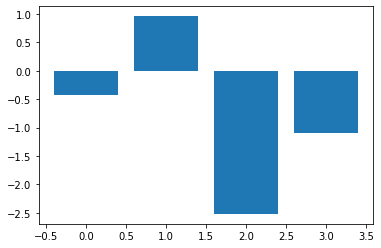

[3, -1.085926010005274]

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from matplotlib import pyplot
model.fit(X, y)
model_name='Logistic_Regg'
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate (importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
feature_importance(mod=model_name, importance=importance)

Feature: 0, Score: 0.01333
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.06406
Feature: 3, Score: 0.92261


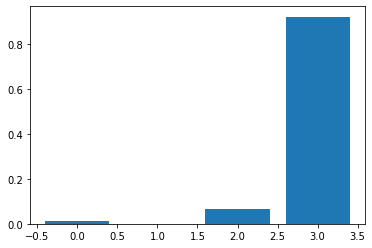

[3, 0.9226107085346216]

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
model_name='Dec_tree_class'
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
feature_importance(mod=model_name, importance=importance)

Feature: 0, Score: 0.09268
Feature: 1, Score: 0.02140
Feature: 2, Score: 0.47058
Feature: 3, Score: 0.41534


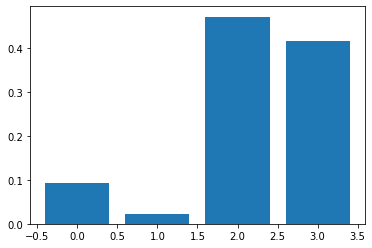

[3, 0.41533657762551546]

In [11]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
model_name='Ran_for_class'
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
feature_importance(mod=model_name, importance=importance)

Feature: 0, Score: 0.01240
Feature: 1, Score: 0.03405
Feature: 2, Score: 0.59922
Feature: 3, Score: 0.35433


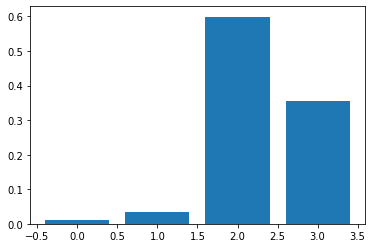

[3, 0.35433412]

In [12]:

from xgboost import XGBClassifier
model = XGBClassifier()
# fit the model
model.fit(X, y)
model_name='XGB_class'
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
feature_importance(mod=model_name, importance=importance)

In [13]:
# Lets plot the results of models
df_FI = pd.DataFrame({'Models': list(feature_importanc_Classification.keys()),
                      'Most important feature': list(feature_importanc_Classification.values())})
df_FI

,Models,Most important feature
0,Logistic_Regg,"[1, 0.961713830009424]"
1,Dec_tree_class,"[3, 0.9226107085346216]"
2,Ran_for_class,"[2, 0.470577180910259]"
3,XGB_class,"[2, 0.5992223]"


In [14]:
for x in feature_importanc_Classification:
    print(feature_importanc_Classification[x][0])

1
3
2
2


In [15]:
#df_FI['Feature']=df_FI['Most important feature'][0][0].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2 })

In [18]:
df_FI['Feature']=0

In [29]:
for i in [0,1,2,3]:
    a=df_FI['Most important feature'][i][0]
    df_FI.iloc[i,2]=a
    print(a)
df_FI

1
3
2
2


,Models,Most important feature,Feature,Feature_name,Importance
0,Logistic_Regg,"[1, 0.961713830009424]",1,SepalLengthCm,0.961714
1,Dec_tree_class,"[3, 0.9226107085346216]",3,PetalLengthCm,0.922611
2,Ran_for_class,"[2, 0.470577180910259]",2,SepalWidthCm,0.470577
3,XGB_class,"[2, 0.5992223]",2,SepalWidthCm,0.599222


In [20]:
df_FI.columns.get_loc("Feature")

2

In [21]:
df_FI['Feature_name']=0

In [22]:
def feature(most,i):
    elig_values = np.where(most[i][0]== 1, 'SepalLengthCm',(np.where(most[i][0]==2, 'SepalWidthCm', 'PetalLengthCm')))
    print(most[i][0])
    return elig_values
for i in [0,1,2,3]:
    df_FI['Feature_name'][i]= feature(df_FI['Most important feature'],i)
df_FI

1
3
2
2


C:\Users\User\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Models,Most important feature,Feature,Feature_name
0,Logistic_Regg,"[1, 0.961713830009424]",1,SepalLengthCm
1,Dec_tree_class,"[3, 0.9226107085346216]",3,PetalLengthCm
2,Ran_for_class,"[2, 0.470577180910259]",2,SepalWidthCm
3,XGB_class,"[2, 0.5992223]",2,SepalWidthCm


In [23]:
df_FI['Importance']=1

In [24]:
for i in [0,1,2,3]:
    a=df_FI['Most important feature'][i][1]
    df_FI.iloc[i,4]=a
    #df_new=df_FI
    print(a)

0.961713830009424
0.9226107085346216
0.470577180910259
0.5992223


In [25]:
df_FI

,Models,Most important feature,Feature,Feature_name,Importance
0,Logistic_Regg,"[1, 0.961713830009424]",1,SepalLengthCm,0.961714
1,Dec_tree_class,"[3, 0.9226107085346216]",3,PetalLengthCm,0.922611
2,Ran_for_class,"[2, 0.470577180910259]",2,SepalWidthCm,0.470577
3,XGB_class,"[2, 0.5992223]",2,SepalWidthCm,0.599222


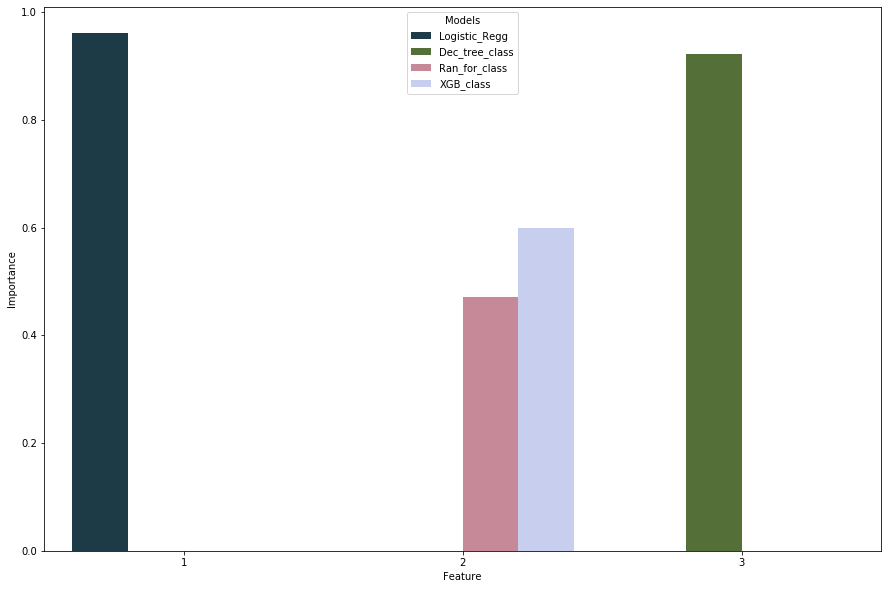

In [26]:
fig = plt.gcf()
fig.set_size_inches(15,10)
ax = sns.barplot(x="Feature", y="Importance", data=df_FI, ci=False, hue = 'Models',palette="cubehelix")
